In [42]:
import numpy as np 
import pandas as pd 
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from statsmodels.graphics.mosaicplot import mosaic

## Data Preprocessing

#### Encode Data

In [2]:
file_path = Path("HR_Employee_Data.csv")
df = pd.read_csv(file_path)
df.head(10)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,38%,53%,2,157,3,0,1,0,sales,low
1,IND28133,80%,86%,5,262,6,0,1,0,sales,medium
2,IND07164,11%,88%,7,272,4,0,1,0,sales,medium
3,IND30478,72%,87%,5,223,5,0,1,0,sales,low
4,IND24003,37%,52%,2,159,3,0,1,0,sales,low
5,IND08609,41%,50%,2,153,3,0,1,0,sales,low
6,IND14345,10%,77%,6,247,4,0,1,0,sales,low
7,IND16300,92%,85%,5,259,5,0,1,0,sales,low
8,IND27336,89%,100%,5,224,5,0,1,0,sales,low
9,IND41409,42%,53%,2,142,3,0,1,0,sales,low


In [3]:
df.dtypes

Emp_Id                   object
satisfaction_level       object
last_evaluation          object
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
Department               object
salary                   object
dtype: object

In [4]:
df['satisfaction_level'] = df['satisfaction_level'].str.rstrip('%').astype('float') / 100.0

In [5]:
df['last_evaluation'] = df['last_evaluation'].str.rstrip('%').astype('float') / 100.0

df

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,IND40221,0.40,0.57,2,151,3,0,1,0,support,low
14995,IND24196,0.37,0.48,2,160,3,0,1,0,support,low
14996,IND33544,0.37,0.53,2,143,3,0,1,0,support,low
14997,IND40533,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,7,1
1,IND28133,0.80,0.86,5,262,6,0,1,0,7,2
2,IND07164,0.11,0.88,7,272,4,0,1,0,7,2
3,IND30478,0.72,0.87,5,223,5,0,1,0,7,1
4,IND24003,0.37,0.52,2,159,3,0,1,0,7,1


In [8]:
df.drop(['Emp_Id'], axis=1, inplace = True)

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


#### Train Data

In [11]:
X = pd.get_dummies(df.drop('left', axis=1))
y = df[['left']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y['left'], 
                                                    random_state=1, 
                                                    stratify=y)

#### Scale Data

In [13]:
scaler = StandardScaler()

In [14]:
X_scaler = scaler.fit(X_train)

In [15]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

## Gaussian Naive Bayes

In [17]:
gnb =  GaussianNB()

In [18]:
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
predictions = gnb.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1


In [20]:
confusion_matrix(y_test, predictions)
target_names = ["Stay", "Leave"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

        Stay       0.90      0.84      0.87      2857
       Leave       0.57      0.71      0.63       893

    accuracy                           0.80      3750
   macro avg       0.74      0.77      0.75      3750
weighted avg       0.82      0.80      0.81      3750



## Logistic Regression

In [22]:

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=500,
                                random_state=1)
classifier.fit(X_train, y_train)

# Execute LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [23]:
confusion_matrix(y_test, predictions)
target_names = ["Stay", "Leave"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

        Stay       0.80      0.93      0.86      2857
       Leave       0.53      0.24      0.33       893

    accuracy                           0.77      3750
   macro avg       0.66      0.59      0.60      3750
weighted avg       0.73      0.77      0.73      3750



## Support Vector Machines

In [25]:
classifier = svm.SVC()

In [26]:
classifier.fit(X_train, y_train)

SVC()

predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

In [34]:
cm = confusion_matrix(y_test, predictions)
target_names = ["Stay", "Leave"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

        Stay       0.97      0.98      0.98      2857
       Leave       0.93      0.91      0.92       893

    accuracy                           0.96      3750
   macro avg       0.95      0.95      0.95      3750
weighted avg       0.96      0.96      0.96      3750



## Visualization

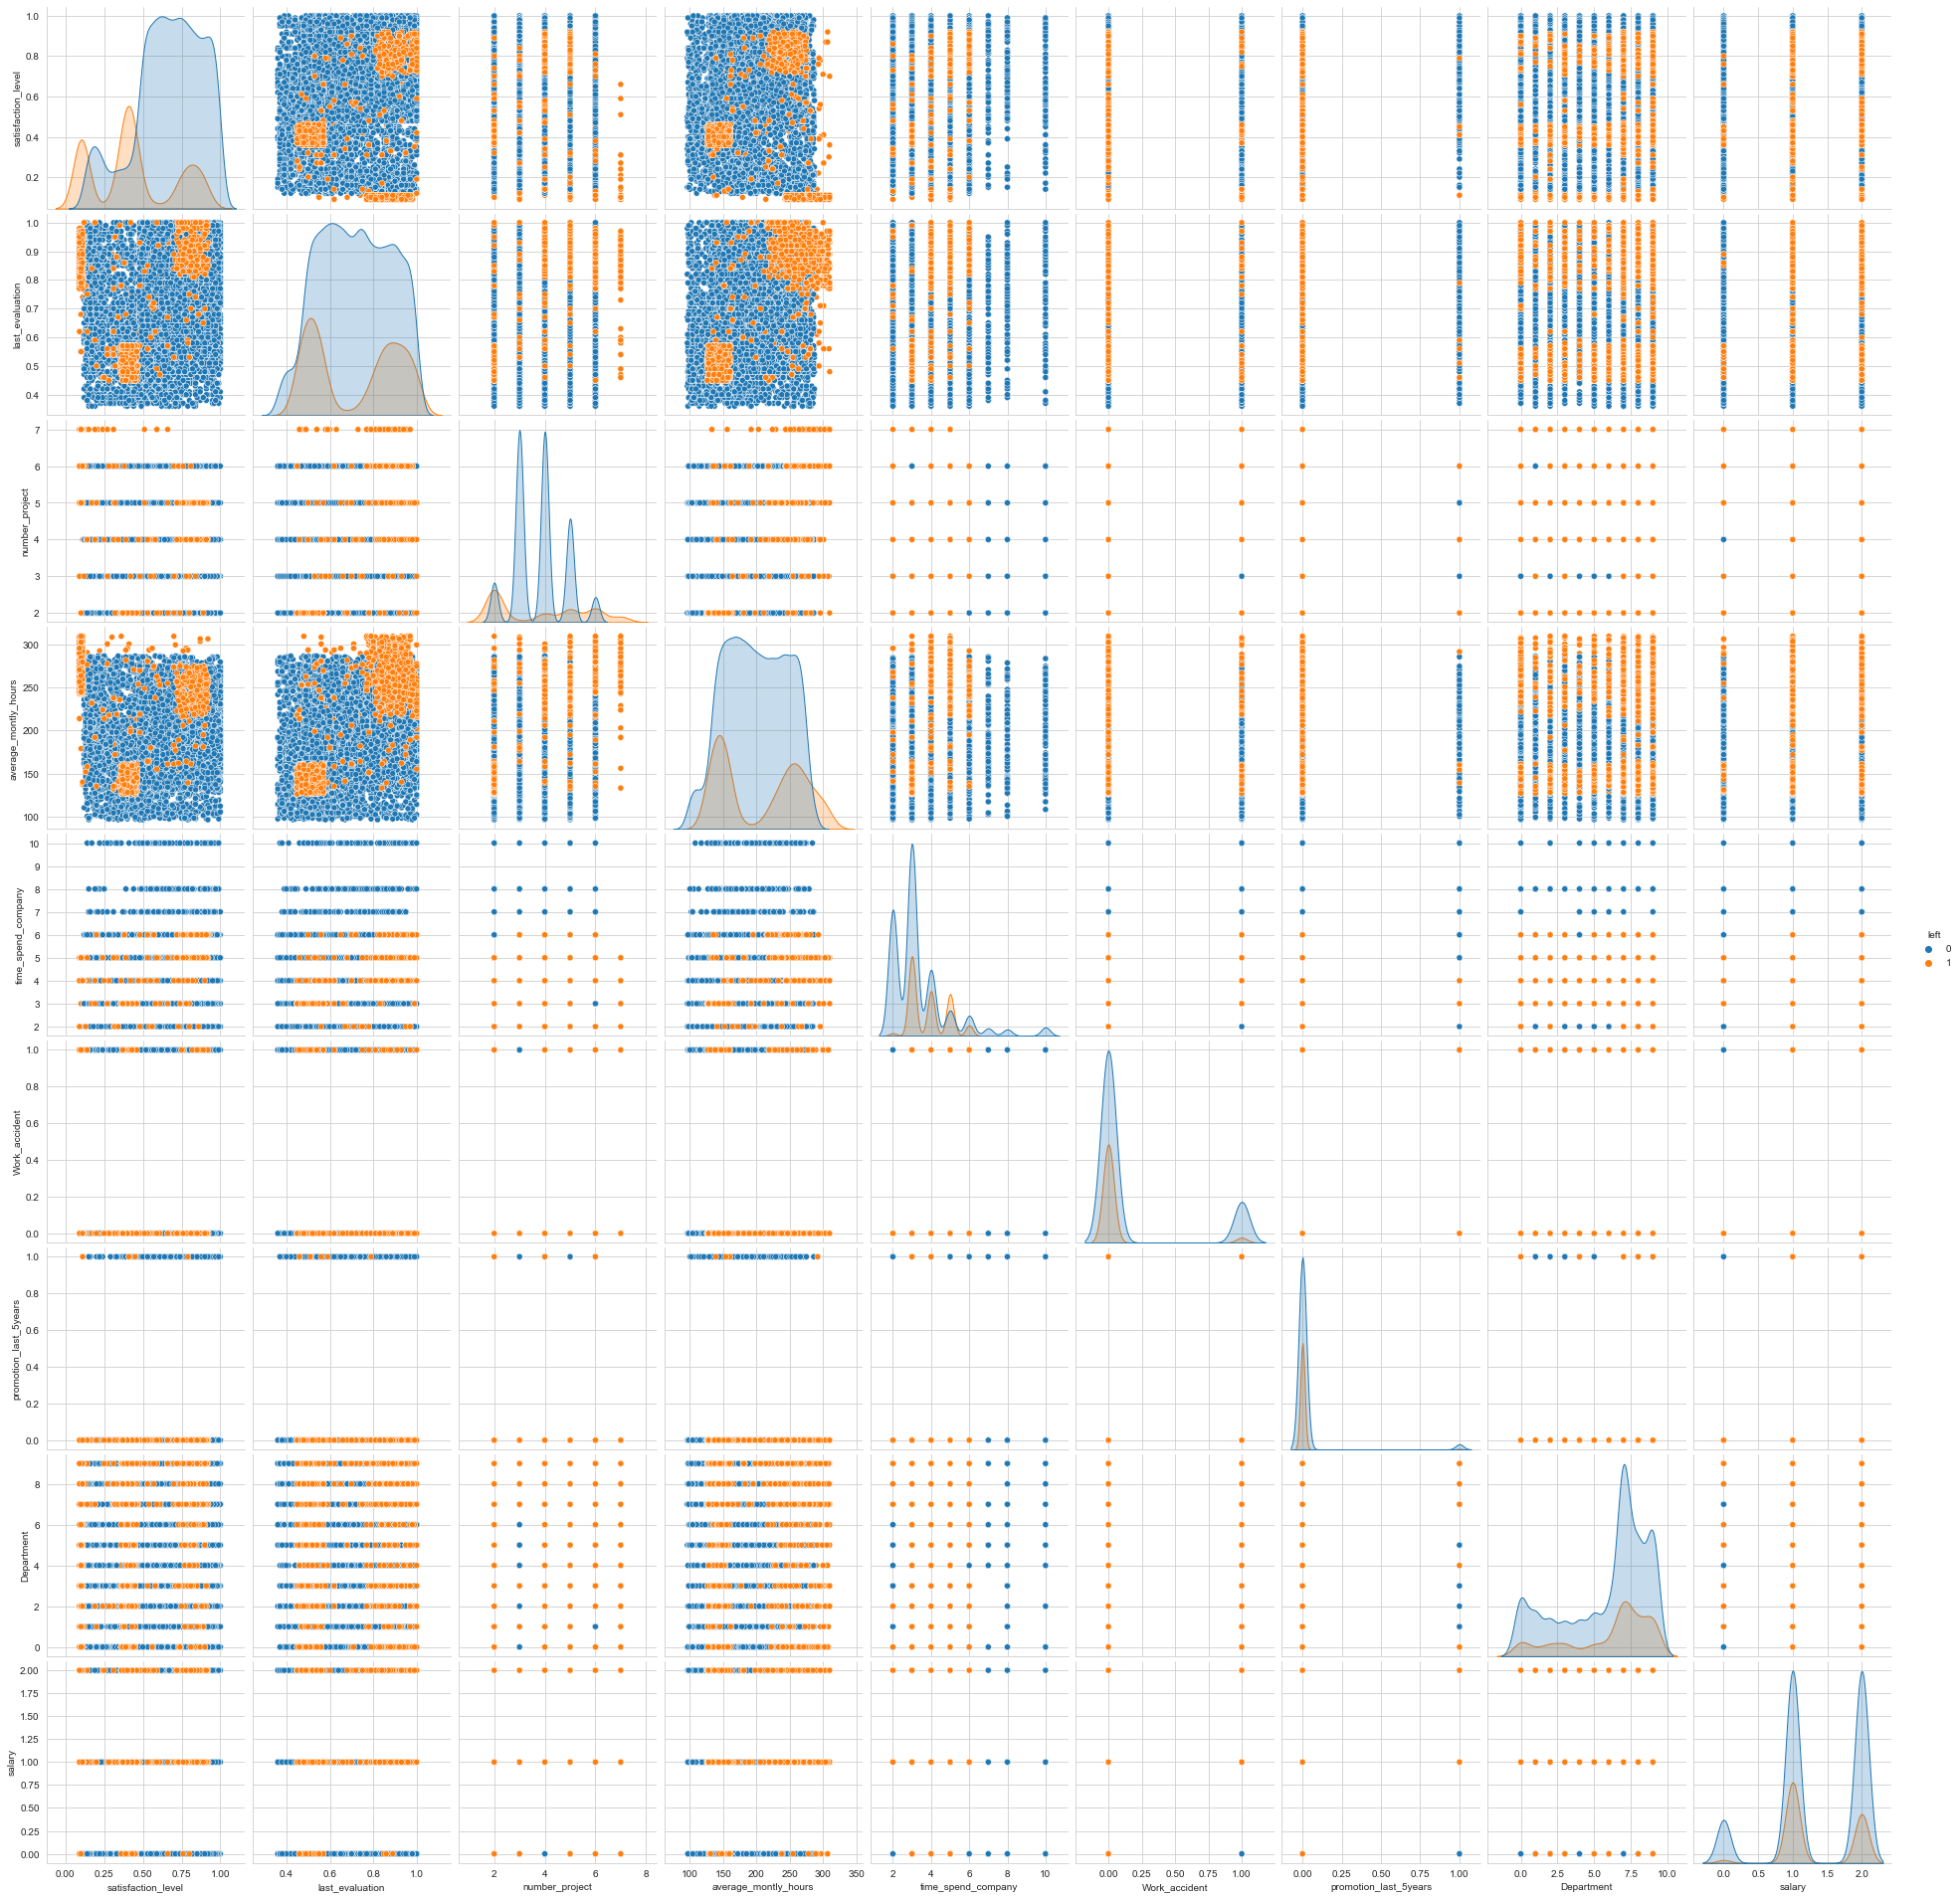

In [50]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="left", height=3);
plt.show()